# HW4_Assignment2

## Set up the work for data-driven inference based on CitiBike data

In [ ]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

## Idea：

Subscribers are more likely than customers to choose biking for commuting.

## Null Hypothesis:

The proportion of subscribers biking on weekends is the same or higher than the proportion of customers biking on weekends.  
  
## _$H_0$_: $\frac{S_{\mathrm{weekend}}}{S_{\mathrm{total}}} >= \frac{C_{\mathrm{weekend}}}{C_{\mathrm{total}}}$

## Alternative Hypothesis

The proportion of subscribers biking on weekends is less than the proportion of customers biking on weekends.  
  
## _$H_1$_ : $\frac{S_{\mathrm{weekend}}}{S_{\mathrm{total}}} < \frac{C_{\mathrm{weekend}}}{C_{\mathrm{total}}}$

## significance level  $\alpha=0.05$

### reading data from citibike csv file from Feb 2015

In [2]:
 def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201502'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [5]:
# to get column names
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'birth year'], axis=1, inplace=True)

In [7]:
df.head()

,usertype,date
0,Subscriber,2015-02-01 00:00:00
1,Subscriber,2015-02-01 00:00:00
2,Subscriber,2015-02-01 00:01:00
3,Subscriber,2015-02-01 00:01:00
4,Subscriber,2015-02-01 00:01:00


## plot the number of trips per week day

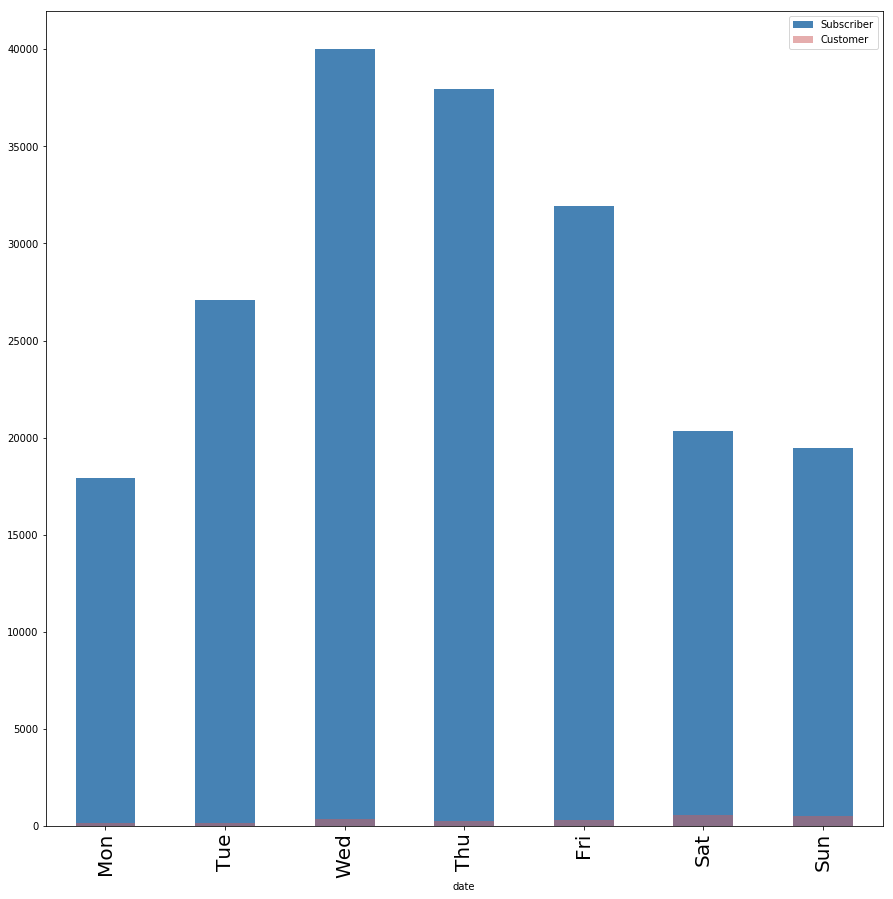

In [8]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['date'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='SteelBlue', 
                                                                                         label='Subscriber')

norm_m = 1
ax = ((df['date'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='IndianRed', 
                                                                                              alpha=0.5,
                                                                                              label='Customer')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

## Figure 1a: Distribution of Citibike bikers by usertype in Feburary 2015, absolute counts

### Note: the counts have errors of course. what is the error on the count statistics? 
### for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic

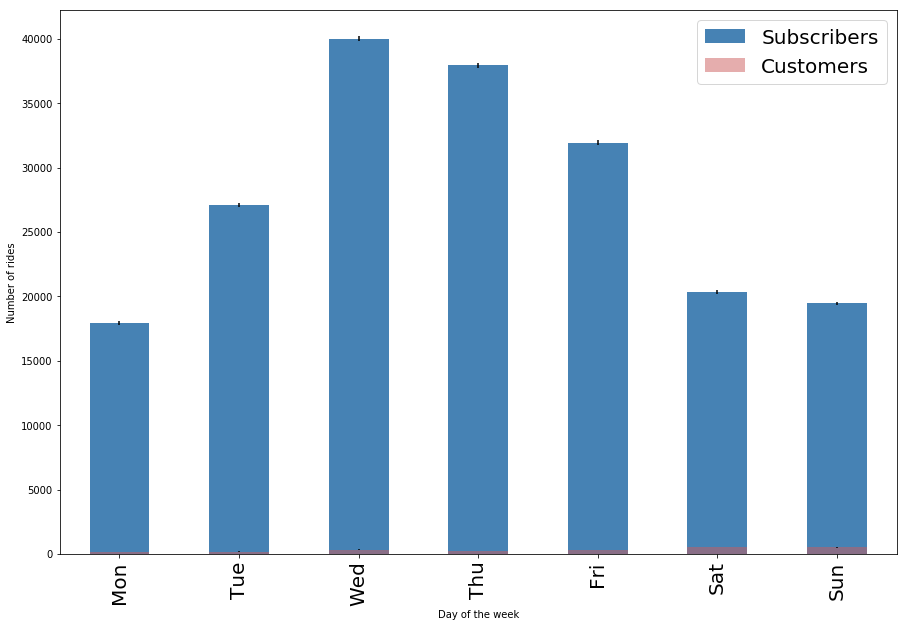

In [9]:
fig=pl.figure(figsize(15,10))

counts_s = df.date[df.usertype == 'Subscriber'].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s = np.sqrt(counts_s)
ax=((counts_s) / norm_s).plot(kind="bar",color='SteelBlue',  yerr=[
            ((error_s) / norm_s, (error_s) / norm_s)], label='Subscriber')


counts_c = df.date[df.usertype=='Customer'].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c=np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", alpha=0.5, yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           color='IndianRed', label='men bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['Subscribers','Customers'],fontsize=20)



## Figure 1b: Distribution of Citibike bikers by usertype in Feburary 2015, absolute counts, with statistical errors

_normalize_ the distribution of subscribers, and that of customers, i.e. devide them by the total number of rides for that usertype. 

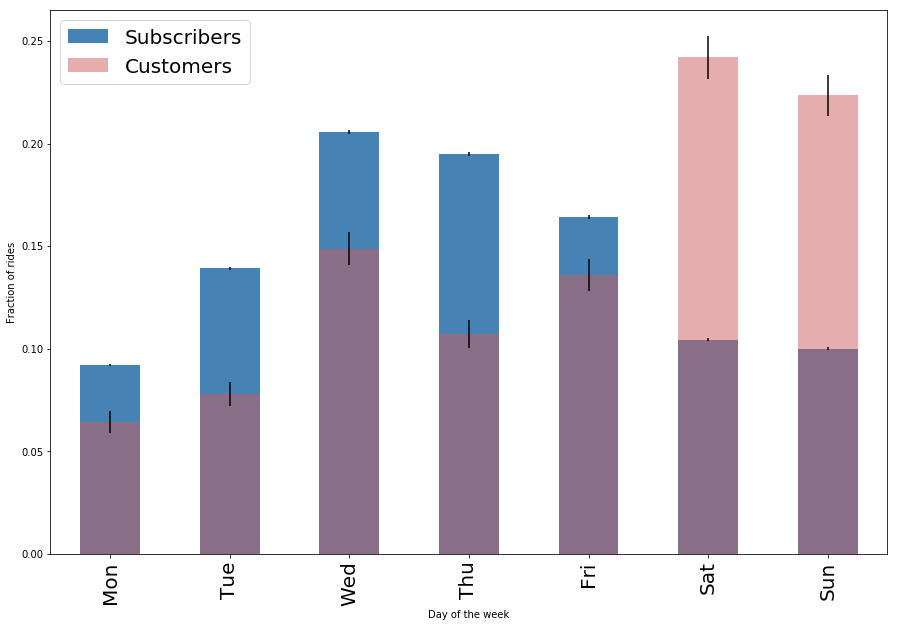

In [10]:
fig = pl.figure(figsize(15,10))

norm_s = counts_s.sum()
error_s = np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", color='SteelBlue',  
                           yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           label='Subscirbers')

norm_c = counts_c.sum()
ax = ((counts_c) / norm_c).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                                color='IndianRed', label='Customer')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['Subscribers','Customers'],fontsize=20)



## Figure 2: Distribution of Citibike bikers by usertype in Feburary 2015, normalized